In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

# 1. 범주형

In [2]:
path = "C:/Users/rksla/Downloads/adult.data"

data = pd.read_csv(
    path,
    header=None, index_col=False,
    names=[
        "age", "workclass", "fnlwgt", "education", "education-num",
        "martial-status", "occupation", "relationship", "race", "gender",
        "capital-gain", "capital-loss", "hours-per-week", "native-country",
        "income"
    ]
)

data = data[["age", "workclass", "education", "gender", "hours-per-week", "occupation", "income"]]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
data.columns

Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   gender          32561 non-null  object
 4   hours-per-week  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   income          32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


### 원 핫 인코딩(가변수, 원 아웃 오브 N 인코딩)

범주형 변수를 0 OR 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것<br>
ex. 학생정보 (학번, 학과, 학년) : (100, 경제학, 2), (101, 법학, 3)과 같이 있다면<br>
&nbsp; \>>> 학생정보 (학번, 학과_경제학, 학과_법학, 학년) : (100, 1, 0, 2), (101, 0, 1, 3)과 같이 변환

원 핫 인코딩 결과로 나오는 열 수는 범주의 개수와 같다 <br>
\*** 나머지 하나는 전부 0으로 표현하는 것으로는 안되나? <br>
&nbsp; >>> 행렬 변환 시 0이면 문제가 될 수 있기 때문에 원 핫 형태로 변환 (~ 계산 편의) <br>
&nbsp; >>> 랭크 부족 현상(한 열이 다른 열에 의존적이거나, 전부 0인 경우) 을 피하기 위한 조치

In [6]:
data_dummies = pd.get_dummies(data)

data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [7]:
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
features = data_dummies.loc[ : , "age" : "occupation_ Transport-moving"]
X = features.values
y = data_dummies["income_ >50K"].values

In [10]:
X.shape, y.shape

((32561, 44), (32561,))

In [11]:
"""
문자열을 원 핫 형태로 바꿨으니 학습 알고리즘을 적용할 수 있다
"""

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

0.8092371944478566

### 범주형 특성이 숫자로 표현된 경우

범주형 자료는 다음과 같이 표현될 수 있다 <br>
1. 문자열로 표현된 경우 (위 예제와 같은 경우)
2. 숫자로 표현된 경우 <br>
\>>> 즉 (경제학: 1, 법학: 2, 천문학: 3, 수학: 4)와 같이 표현한 경우<br>

\*** 2의 경우, 수치형일 경우 get_dummies 사용 시 변화가 없지만, '1', '2'와 같이 문자일 경우 변환된다


In [12]:
"""
pd.get_dummies 특징

    1. 수치형 자료는 빼고 더미 변수화 한다
    2. 숫자이지만 '1', '2'와 같이 자료형이 문자일 경우 이 역시 더미 변수화 한다
"""

demo_df = pd.DataFrame(
    {
        '숫자특성': [0, 1, 2, 1],
        '범주형특성': ['양말', '여우', '양말', '상자']
    }
)

demo_df

,숫자특성,범주형특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [13]:
pd.get_dummies(demo_df)

,숫자특성,범주형특성_상자,범주형특성_양말,범주형특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [14]:
demo_df['숫자특성'] = demo_df['숫자특성'].astype(str)

pd.get_dummies(demo_df)

,숫자특성_0,숫자특성_1,숫자특성_2,범주형특성_상자,범주형특성_양말,범주형특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 2. OneHotEncoder, ColumnTransformer

### OneHotEncoder

동작: ''' 모든 열에 ''' 원 핫 인코딩 적용 <br>
&nbsp; >>> 연속형 자료까지 전부 하나의 범주로 인식<br>

In [15]:
"""
OneHotEncoder(
    sparse=bool >>> (true: 희소 행렬(default), false: ndarray)
)

*** 1.4 이후론 sparse=bool 대신 sparse_output=bool 로 사용
"""

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit_transform(demo_df)

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [16]:
ohe.get_feature_names()

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_0', 'x0_1', 'x0_2', 'x1_상자', 'x1_양말', 'x1_여우'], dtype=object)

In [17]:
ohe.get_feature_names_out()

array(['숫자특성_0', '숫자특성_1', '숫자특성_2', '범주형특성_상자', '범주형특성_양말', '범주형특성_여우'],
      dtype=object)

### ColumnTransformer: 열 별 변환

동작: 열 별로 지정한 변환 적용 <br>

In [70]:
"""
ex.
    age, hours-per-week는 StandardScaler를 이용한 변환
    그 외 범주형 자료는 OneHotEncoder를 이용해 원 핫 형태로 변환할 경우
"""

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ("scaling", StandardScaler(), ['age', 'hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])
])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)

In [20]:
X_train_trans

array([[ 1.49894077, -0.44509689,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.38045121, -1.66848877,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2501343 , -0.03729959,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.14559057, -0.03729959,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.47051192,  0.3704977 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.99867216,  0.61517608,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
X_train_trans.shape

(24420, 44)

In [22]:
ct.get_feature_names_out()

array(['scaling__age', 'scaling__hours-per-week', 'onehot__workclass_ ?',
       'onehot__workclass_ Federal-gov', 'onehot__workclass_ Local-gov',
       'onehot__workclass_ Never-worked', 'onehot__workclass_ Private',
       'onehot__workclass_ Self-emp-inc',
       'onehot__workclass_ Self-emp-not-inc',
       'onehot__workclass_ State-gov', 'onehot__workclass_ Without-pay',
       'onehot__education_ 10th', 'onehot__education_ 11th',
       'onehot__education_ 12th', 'onehot__education_ 1st-4th',
       'onehot__education_ 5th-6th', 'onehot__education_ 7th-8th',
       'onehot__education_ 9th', 'onehot__education_ Assoc-acdm',
       'onehot__education_ Assoc-voc', 'onehot__education_ Bachelors',
       'onehot__education_ Doctorate', 'onehot__education_ HS-grad',
       'onehot__education_ Masters', 'onehot__education_ Preschool',
       'onehot__education_ Prof-school',
       'onehot__education_ Some-college', 'onehot__gender_ Female',
       'onehot__gender_ Male', 'onehot__occu

In [23]:
len(ct.get_feature_names_out())

44

In [24]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

LogisticRegression(max_iter=1000)

In [25]:
X_test_trans = ct.transform(X_test)

In [26]:
logreg.score(X_test_trans, y_test)

0.808991524382754

In [27]:
ct.named_transformers_

{'scaling': StandardScaler(), 'onehot': OneHotEncoder(sparse=False)}

# 3. make_column_transformer

make_column_transformer VS ColumnTransformer <br>
<br>
make_column_transformer: 함수 인자로 (변환기 객체, \[적용할 열 리스트\]) 튜플 여러 개 전달 <br>
ColumnTransformer: 객체 인자로 \[ (이름, 변환기 객체, [적용할 열 리스트] ) \] 튜플을 담은 리스트 전달 <br>
<br>
\*** 결과는 둘 다 똑같지만 get_feature_names_out()에서 나오는 이름은 다르다

In [28]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])
)

In [29]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)

In [30]:
ct.get_feature_names_out()

array(['standardscaler__age', 'standardscaler__hours-per-week',
       'onehotencoder__workclass_ ?',
       'onehotencoder__workclass_ Federal-gov',
       'onehotencoder__workclass_ Local-gov',
       'onehotencoder__workclass_ Never-worked',
       'onehotencoder__workclass_ Private',
       'onehotencoder__workclass_ Self-emp-inc',
       'onehotencoder__workclass_ Self-emp-not-inc',
       'onehotencoder__workclass_ State-gov',
       'onehotencoder__workclass_ Without-pay',
       'onehotencoder__education_ 10th', 'onehotencoder__education_ 11th',
       'onehotencoder__education_ 12th',
       'onehotencoder__education_ 1st-4th',
       'onehotencoder__education_ 5th-6th',
       'onehotencoder__education_ 7th-8th',
       'onehotencoder__education_ 9th',
       'onehotencoder__education_ Assoc-acdm',
       'onehotencoder__education_ Assoc-voc',
       'onehotencoder__education_ Bachelors',
       'onehotencoder__education_ Doctorate',
       'onehotencoder__education_ HS-grad'

# 4. 구간 분할 (=이산화)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

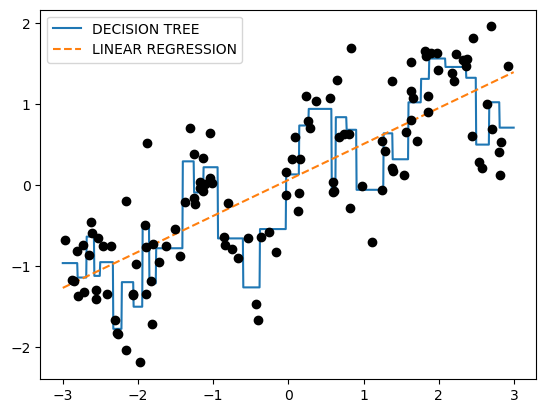

In [72]:
reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DECISION TREE")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="LINEAR REGRESSION")

plt.plot(X[ : , 0], y, 'o', c='k')

plt.legend(loc='best')

### KBinsDiscretizer

KBinsDiscretizer를 이용한 구간 분할 방법 <br>
1. 같은 간격으로 분할 >>> 간격 크기는 같지만 안에 구간에 해당하는 원소 수는 다를 수 있다
2. 분위수로 분할 >>> 간격 크기는 다르지만 안에 구간에 해당하는 원소 수는 비슷하다

In [73]:
"""
KBinsDiscretizer(
    n_bins: ~개 구간만큼 분할
    stratege: 분할 방법 정의 (uniform: 같은 간격, quantile: 분위수, kmeans: n_bins개의 중심 중 가장 유사한 쪽으로 분류)
    encode: transform 결과 형태
        onehot: 희소행렬
        onehot_dense: ndarray
        ordinal: 순위 형태로 표시 (1, 2, ...)
)
"""

from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [74]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [75]:
X[ : 5].ravel()

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816])

In [76]:
X_binned.toarray()[ : 5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [77]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)

X_binned = kb.transform(X)

In [78]:
X_binned

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 구간 분할 후 각 모델의 예측

In [79]:
X[ : , 0]

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

In [80]:
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

In [81]:
X.ravel()

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

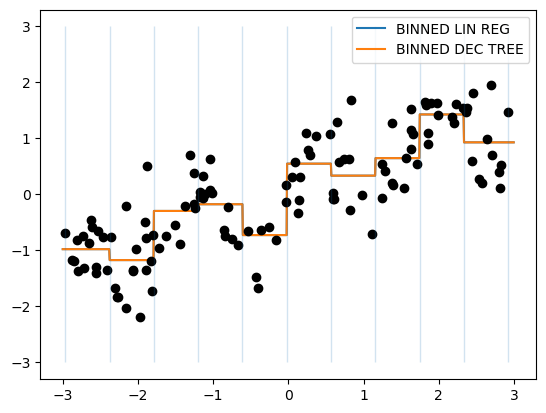

In [82]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='BINNED LIN REG')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='BINNED DEC TREE')

plt.plot(X[ : , 0], y, 'o', c='k')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)

plt.legend(loc='best')

plt.show()

In [83]:
line_binned

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [84]:
y

array([-0.79249866,  0.69625015,  0.1719942 , -0.08635681, -1.34410798,
       -1.36159963, -0.86065829,  1.27844739, -0.07659492, -0.06644527,
       -1.17332867,  0.52837701,  1.4128062 , -0.95174986, -0.49962181,
       -1.34624209,  0.0414515 ,  0.31695046, -1.66257358, -0.1616231 ,
        0.58635804, -0.19890805, -0.23868896, -0.2173029 , -0.58392834,
        0.53722145, -0.72877045,  0.58617986,  1.07166135, -1.31838556,
        1.28984345, -2.18863939, -0.5869447 ,  1.95419031,  0.40966983,
        1.09173358, -0.03646663, -1.34420151, -0.70164056, -0.64074822,
       -1.83822065,  0.16457903, -1.36454445,  1.80872055, -0.87825286,
       -0.01754106,  0.33256479, -0.3236148 ,  0.7041388 , -0.77091728,
        0.12372598,  1.07499984,  0.99769394,  1.54986537,  0.03110195,
        0.28320767, -0.75543795, -1.18783068, -0.74071224,  0.08304593,
       -0.9003557 , -0.21269751,  1.63242984, -0.64091085,  0.70320704,
        0.79228548, -2.03397273,  1.64718117, -1.40992047,  1.46

결과 해석 <br>
1. 두 모델의 예측이 완전 겹친다 <br>
&nbsp; 원인: 구간 별 입력 값이 다 똑같기 때문<br>
&nbsp; \>>> 선형회귀: [ [1, ...] [~] ]  ||  트리: X가 1보다 큰 샘플 ... 
2. 회귀는 이전보다 비교적 유연해졌지만, 트리는 덜 유연해졌다 <br>
&nbsp; 원인: 트리 모델은 적절한 특성, 기준을 알아서 고르기 때문에 여기선 구간 분할이 도움되지 않는다

### 상호작용, 다항식

#### 1. [원래 값, 구간 인코딩 결과] 결합

In [85]:
X_combined = np.hstack([X, X_binned])
X_combined

array([[-0.75275929,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.70428584,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.39196365,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.88057965,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.35535399,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.23605345,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [86]:
X_combined.shape

(120, 11)

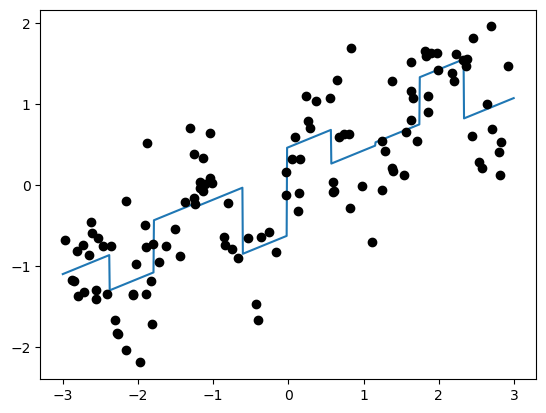

In [87]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='COMBINED')

plt.plot(X[ : , 0], y, 'o', c='k')

결과: 각 구간의 절편 학습, 기울기 형성<br>
한계: 전 구간의 기울기가 동일함<br>
원인<br>
- 새로 추가한 특성은 구간을 원 핫 인코딩 변환하기 전 자료
- [구간 원 핫 인코딩 변환]으로만 학습하면 결과는 상수 형태: (1)
- 변환 전 자료만 학습하면 결과는 하나의 직선 형태: (2)
- [원본, 구간 정보]를 학습하면 절편은 (1) 때문에 다르게 나오지만 기울기는 (2) 때문에 같게 나온다
- 각 구간에 대한 가중치는 다르지만 값에 대한 가중치는 구간에 관계 없이 같다
<br>

#### 2. 상호작용 추가: [구간 정보, (원본) \* [구간 정보]] 형태로 결합

In [91]:
"""변형 결과 특성이 20개로 증가"""

X_product = np.hstack([X_binned, X * X_binned])
X_product

array([[ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.70428584],
       [ 0.        ,  0.        ,  0.        , ...,  1.39196365,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.35535399],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [92]:
X_product[0]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.75275929, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [93]:
X_product.shape

(120, 20)

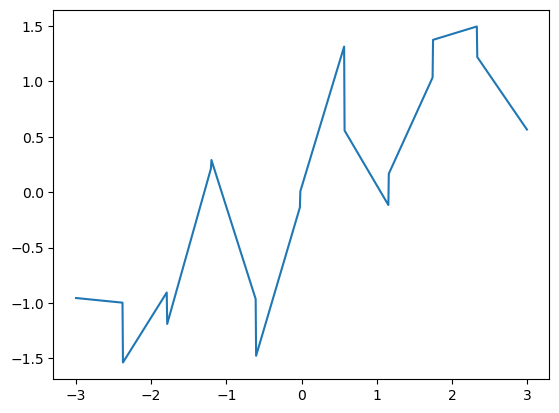

In [94]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='PRODUCT')

결과: 구간 별 기울기 학습<br>
원인(추정): 값은 같지만 형태가 다르니까 가중치도 달라서 그런 것이 아닐까?

In [95]:
X2 = X * X_binned
X2[0]

array([-0.        , -0.        , -0.        , -0.75275929, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

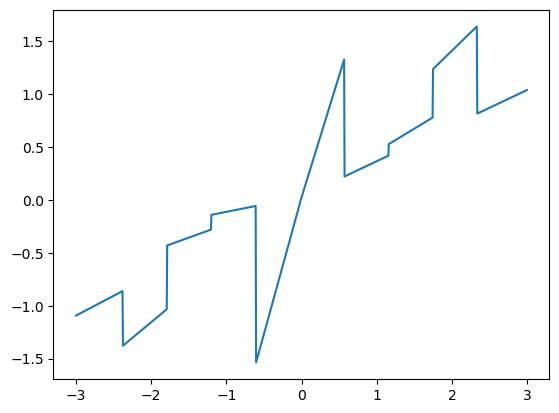

In [96]:
reg = LinearRegression().fit(X2, y)

line2 = line * line_binned
plt.plot(line, reg.predict(line2), label='PRODUCT')

In [97]:
line[ : 10]

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.97 ],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946]])

In [98]:
line_binned[ : 10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#### 3. 원본을 다항식 형태로 변형

In [99]:
"""
여기선 단일 특성을 10차원으로 변형
    결과: 1개 특성 >>> 10개 특성
    형태: [x0, x0^2, x0^3, ..., x0^10]
"""

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)

In [100]:
X_poly.shape

(120, 10)

In [101]:
X[ : 5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [102]:
X_poly[ : 5]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [103]:
poly.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10'], dtype=object)

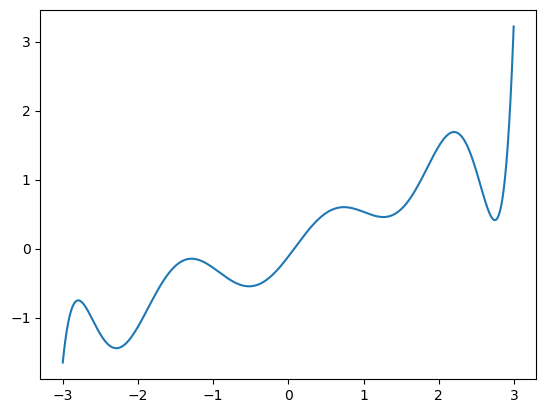

In [104]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='POLY')

plt.show()

특징
- 저차원 자료에 대해서도 부드러운 곡선을 만들어낸다
- 양 끝에선 기울기가 급격해진다 >>> 자료가 적기 때문

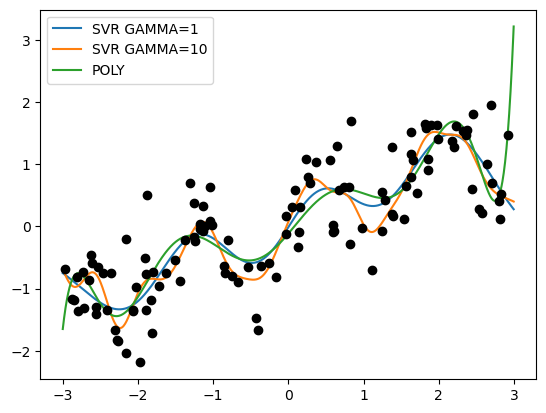

In [105]:
""" RBF 커널 SVM과 10차 다항회귀 비교 """

from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR GAMMA={}'.format(gamma))

plt.plot(line, reg.predict(line_poly), label='POLY')

plt.legend()

plt.plot(X[ : , 0], y, 'o', c='k')

plt.show()

In [106]:
""" 사례: 집값 자료를 2차 다항식 형태로 변형하기 전후의 결과 비교 """

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [107]:
"""
변형 전 특성 수: 13
변형 후 특성 수: 105 
    >>>
    1. 아무것도 고르지 않은 것 >>> 1
    2. x0 ~ x12 >>> 13
    3. A*B >>> (13 * 12) / 2 >>> 91
"""

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [108]:
X_train.shape, X_train_poly.shape

((379, 13), (379, 105))

In [109]:
poly.get_feature_names()

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

특성 추가 후 릿지 회귀 사용 결과 성능 상향

In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)

0.5768611445540043

In [111]:
ridge = Ridge().fit(X_train_poly, y_train)
ridge.score(X_test_poly, y_test)

0.7411219642018821

단, 랜덤 포레스트의 경우에선 성능은 비슷함 >>> 알고리즘 안에서 알아서 적절한 특성 조합들을 고르기 때문

In [112]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.785231209287454

In [113]:
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
rf.score(X_test_poly, y_test)

0.7607681010412639

### 일변량 비선형 변환

특성 변환 방법 <br>
1. 구간 분할
2. 차수 증가: 다항식 형태로 변환 (여기까진 위에서 한 것)
3. 수학 함수 적용: log, exp, sin, ...
<br>
*** 대부분의 모델의 경우 정규분포와 비슷할 수록 더 좋은 성능을 낸다 <br>
&nbsp; >>> 모델에서 아예 정규분포라고 가정하기 때문

In [130]:
"""
    ex.정수 카운트 자료를 그대로 사용했을 때와 변환 후 사용했을 때 비교
        X: 카운트, 정수 (ex. 로그인 횟수, 방문 고객 수 등)
        y: X에 따른 결과, 실수
        
        *** X는 푸아송 분포를 따른다고 가정 
            >>> 푸아송 분포: 기댓값이 lam인 사건이 X번 일어날 확률 (rnd.poisson()은 횟수만 반환)
"""

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org)) # rnd.poisson(기댓값, 출력형태)
y = np.dot(X_org, w)

In [131]:
10 * np.exp(X_org)

array([[58.36039191, 14.92059243, 26.61095777],
       [94.01725152, 64.72471246,  3.76334133],
       [25.85938291,  8.59540609,  9.01929563],
       ...,
       [ 2.7165563 , 15.9480369 , 11.74809871],
       [13.7717174 , 79.97881266,  4.03545521],
       [ 8.2497334 ,  2.97448034,  9.22564012]])

In [132]:
X

array([[56, 18, 27],
       [81, 57,  3],
       [25,  9, 11],
       ...,
       [ 2, 16, 16],
       [ 7, 76,  4],
       [ 7,  3,  8]])

In [133]:
X[ : , 0]

array([ 56,  81,  25,  20,  27,  18,  12,  21, 109,   7,  15,   1,  27,
         4,   1,   7,   2,  11,   6,  18,   1,   2,   2,   7,  31,   7,
         7,  28,  37,   9,   8,  21,   7,  20,   3,  71,  69,  27,   9,
         7,  12,  43,   9,  18,   4,  21,  16,  12, 120,  33,   9,   6,
        30,   7,  25,  27,  40,  15,   2,   5,   7,   3,   5,  42,  10,
         7,  87,   5,  19,   4,  24,   8,  10,  11,   2,   9,   2,   7,
         1,   0,   4,   8,  32,   2,  11,  16,   2,   5,   1,   8,  13,
        19,  13,  68,   2,  21,  20,  12,  10,  16,   5,   7,   1,   3,
         1,   9,  10,   3,   4, 112,  26,   3,   3,  45,   7,  11,  18,
         2,   4,   3,  11,  13,  10,   2,  28,  10,   8,  14,  14,   3,
        23,   3,  24,  28,  18,  17,  13,  27,  56,  10,  23,  11,  24,
         5,  34,  13,  28,   0,  32,   5,   1,  12,   6,  14,   8,  84,
         1,   5,  45,   1,  22,   9,  47,  14,  29,   9,   2,   9,  10,
         1,  25,   2,  17,  60,   0,   6,   0,  12,   0,  10,  1

In [134]:
np.bincount(X[ : , 0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1], dtype=int64)

In [135]:
np.bincount(X[ : , 0]).size

141

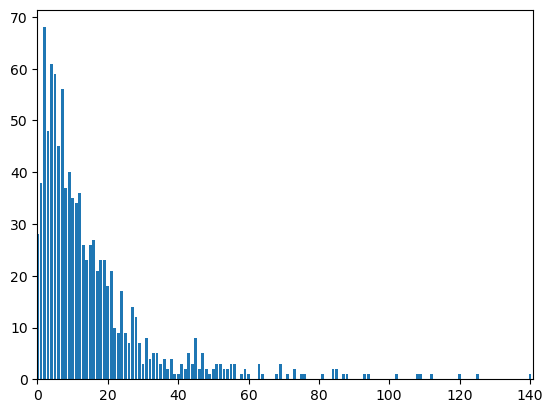

In [143]:
""" 원본은 왼쪽으로 치우쳐진 형태 """

cuts = np.bincount(X[ : , 0])

plt.bar(range(len(cuts)), cuts)
plt.xlim(0, len(cuts))

plt.show()

In [144]:
"""
    변형 전 자료를 그대로 이용해 학습
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
score

0.6224186236310756

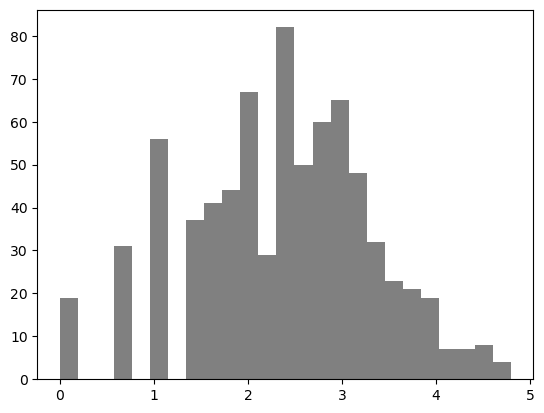

In [137]:
"""
    원본을 로그스케일로 바꾼 뒤 분포 확인
    *** log ( 0 )은 정의되지 않으므로 log (X+1) 사용
"""

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[ : , 0], bins=25, color='gray')
plt.show()

In [68]:
X_train

array([[ 5,  1, 12],
       [ 1, 15,  5],
       [16,  5,  3],
       ...,
       [37,  7, 17],
       [ 7, 85, 11],
       [ 2, 20, 10]])

In [69]:
X_train_log

array([[1.79175947, 0.69314718, 2.56494936],
       [0.69314718, 2.77258872, 1.79175947],
       [2.83321334, 1.79175947, 1.38629436],
       ...,
       [3.63758616, 2.07944154, 2.89037176],
       [2.07944154, 4.4543473 , 2.48490665],
       [1.09861229, 3.04452244, 2.39789527]])

In [70]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
score

0.8749342372887815

# 특성 자동 선택

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise=  rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.5)

select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

In [72]:
X_train.shape

(284, 80)

In [73]:
X_train_selected.shape

(284, 40)

In [74]:
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False])

([<matplotlib.axis.YTick at 0x140443b0a60>], [Text(0, 0, '0')])

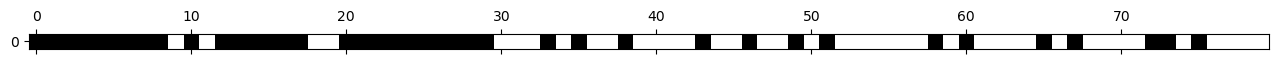

In [75]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks([0])

In [76]:
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.9508771929824561

In [77]:
lr.fit(X_train_selected, y_train)

lr.score(X_test_selected, y_test)

0.9333333333333333

In [78]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median'
)

In [79]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

In [80]:
X_train.shape

(284, 80)

In [81]:
X_train_l1.shape

(284, 40)

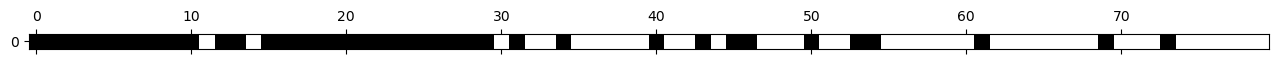

In [82]:
mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks([0])
plt.show()

In [83]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
score

0.9473684210526315

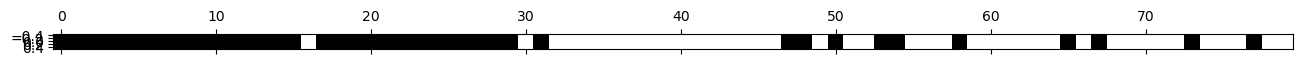

In [84]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [85]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
score

0.9403508771929825

In [86]:
select.score(X_test, y_test)

0.9508771929824561

# 전문가 지식 활용

In [87]:
citibike = mglearn.datasets.load_citibike()
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

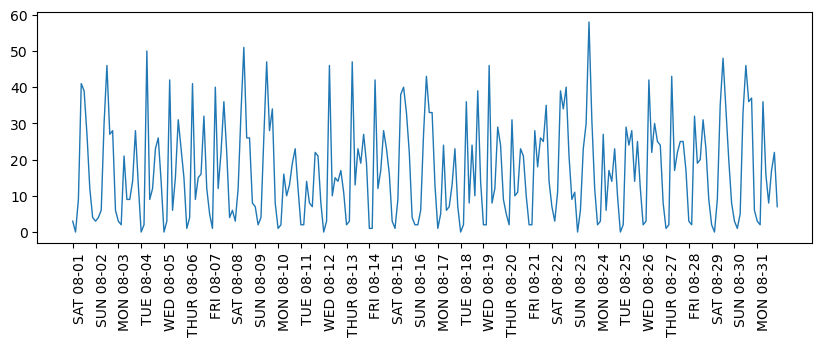

In [88]:
plt.figure(figsize=(10, 3))

xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ['SUN', 'MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT']
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'), xticks.strftime(' %m-%d'))]
plt.xticks(xticks, xticks_name, rotation=90, ha='left')

plt.plot(citibike, linewidth=1)

plt.show()

In [89]:
y = citibike.values
X = citibike.index.astype('int64').values.reshape(-1, 1)

In [90]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[ : n_train], features[n_train : ]
    y_train, y_test = target[ : n_train], target[n_train : ]
    regressor.fit(X_train, y_train)
    print('R^2(TEST SET): {:.2f}'.format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label='TRAIN')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='TEST')
    plt.plot(range(n_train), y_pred_train, '--', label='TRAIN PRED')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='TEST PRED')
    
    plt.legend(loc=(1.01, 0))

R^2(TEST SET): -0.04


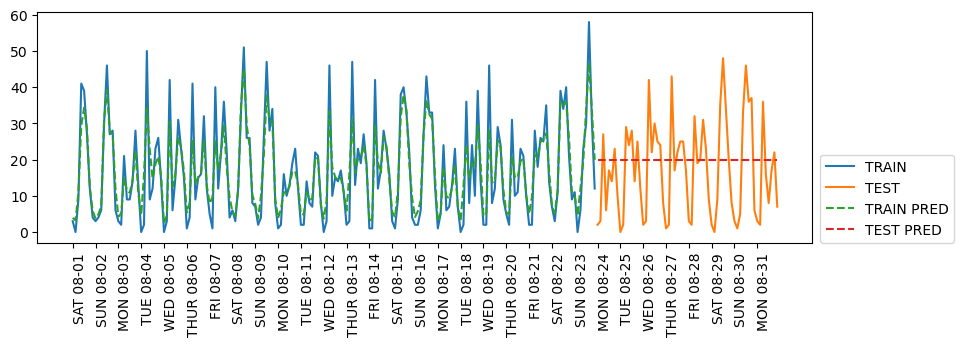

In [91]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

R^2(TEST SET): 0.60


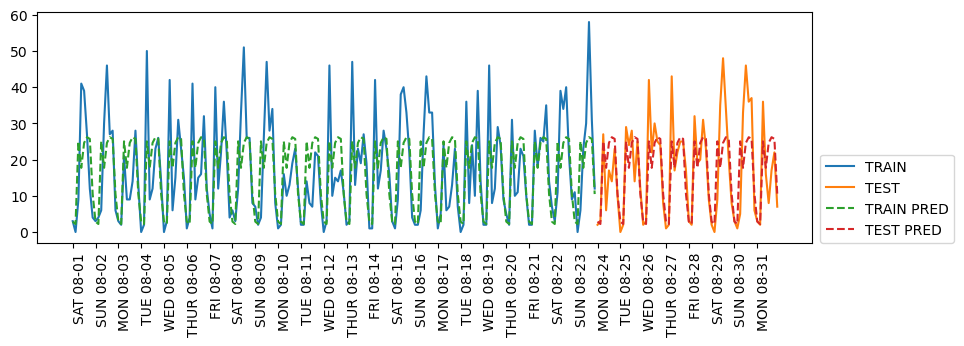

In [92]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

R^2(TEST SET): 0.84


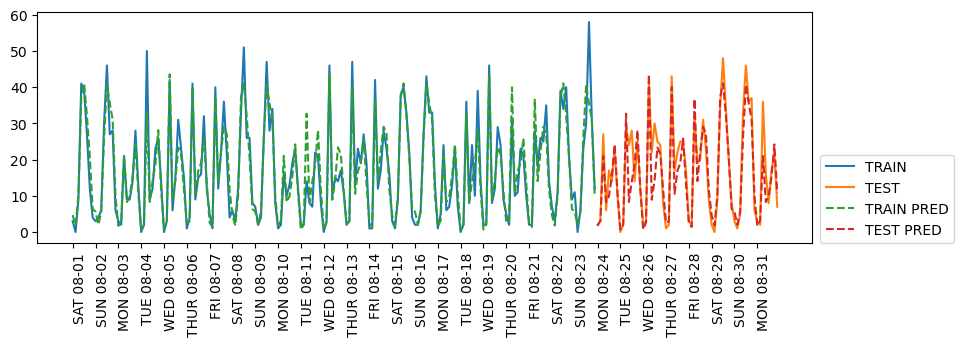

In [93]:
X_hour_week = np.hstack([
    citibike.index.dayofweek.values.reshape(-1, 1),
    citibike.index.hour.values.reshape(-1, 1)
])
eval_on_features(X_hour_week, y, regressor)

R^2(TEST SET): 0.13


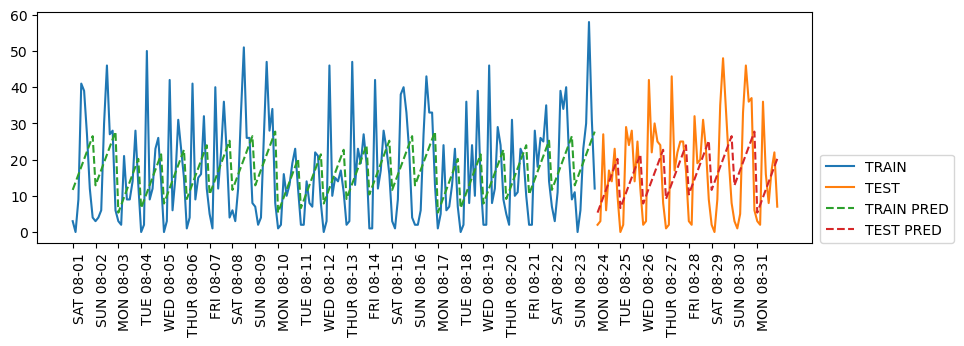

In [94]:
eval_on_features(X_hour_week, y, LinearRegression())

R^2(TEST SET): 0.62


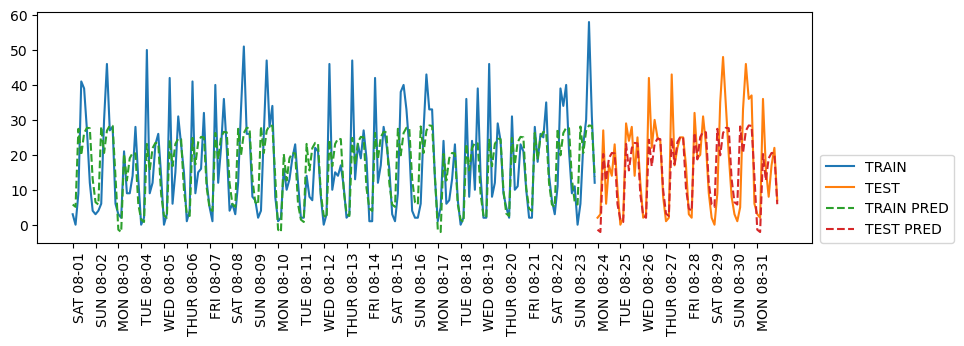

In [95]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

R^2(TEST SET): 0.85


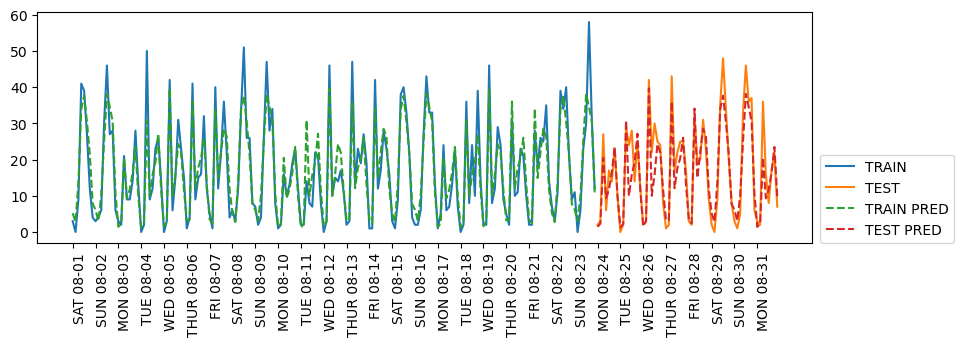

In [96]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)

lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [97]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN']
features = day + hour

In [98]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

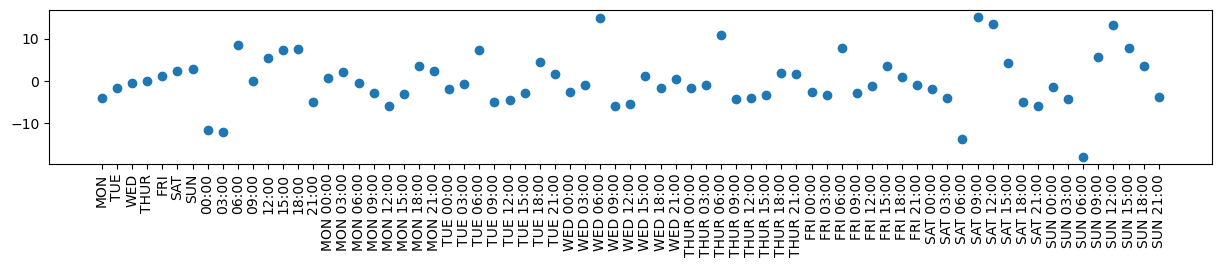

In [99]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)

plt.show()